In [10]:
import pandas as pd
from sklearn.datasets import fetch_california_housing

cal_housing_sk = fetch_california_housing(as_frame=True)
cal_housing = pd.DataFrame(cal_housing_sk.frame)
cal_housing.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [11]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

X = cal_housing.drop(columns=["MedHouseVal"])
Y = cal_housing["MedHouseVal"]
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

num_estimators = [1, 3, 5, 10, 25, 50, 100]
rf_regr_mae_list = []
feat_importance_list = []
for n in num_estimators:
    rf_regr = RandomForestRegressor(n_estimators=n, min_samples_split=2, max_samples=0.5)
    %timeit -n1 -r1 rf_regr.fit(x_train, y_train)
    y_pred = rf_regr.predict(x_test)
    rf_regr_mae = mean_absolute_error(y_test, y_pred)
    rf_regr_mae_list.append(rf_regr_mae)
    feat_importance_list.append(rf_regr.feature_importances_)
    print(f"{n} estimator random forest MAE: {rf_regr_mae:.4}\n")

72.3 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
1 estimator random forest MAE: 0.5082

218 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
3 estimator random forest MAE: 0.4179

366 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
5 estimator random forest MAE: 0.3793

708 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
10 estimator random forest MAE: 0.3573

1.76 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
25 estimator random forest MAE: 0.3412

3.33 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
50 estimator random forest MAE: 0.3378

5.53 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
100 estimator random forest MAE: 0.3367



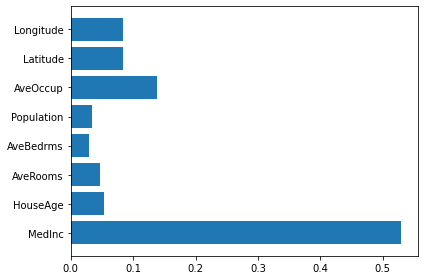

In [12]:
from matplotlib import pyplot as plt

best_model_idx = rf_regr_mae_list.index(min(rf_regr_mae_list))
plt.barh(cal_housing.drop(columns=["MedHouseVal"]).columns.to_numpy(),\
         feat_importance_list[best_model_idx])
plt.tight_layout()
plt.savefig('images/rf_feat_importances.pdf')
plt.show()